# Week 4
**Deliverables**
* Refine prompts for Binary & Multitype

## 1. Prompt Library
Binary and multitype templates that feed every evaluation routine.


In [ ]:
# BINARY PROMPTS
# (1) Zero-Shot — final (no inline JSON examples)
prompt_binary_zeroshot = """
You are an expert analyzing whether a sentence describes Intimate Partner Violence (IPV).
Intimate Partner Violence refers to any physical, emotional, psychological, financial, or sexual harm or coercion occurring within a romantic or formerly romantic relationship. Examples include physical aggression, threats, intimidation, coercion, unwanted sexual acts, emotional abuse (insults, humiliation, degradation), controlling behaviors (monitoring, isolation, restricting access to resources), manipulation, gaslighting, and persistent jealousy.
NOT_IPV should be used when the sentence involves disagreements without abuse or coercion, non-romantic relationships (friends, coworkers, family, strangers), neutral statements, harm not involving a partner, general opinions about relationships, hypothetical or fictional statements without abuse, or consensual behaviors without coercion.

Decide if the following sentence involves IPV or not.
Sentence: "{text}"
Return ONLY one JSON object, enclosed between <json> and </json>.
Format: a single key "label" with value "IPV" or "NOT_IPV".
""".strip()


# (2) Few-Shot — final (no inline JSON examples)
prompt_binary_fewshot = """
You are classifying sentences as describing Intimate Partner Violence (IPV) or NOT_IPV.

Definition:
IPV occurs when one partner harms or controls another physically, emotionally, or sexually.

Here are examples (for guidance only):
1. "He pushed me against the wall and shouted that I’m worthless." → IPV
2. "She often insults me and forbids me from seeing my friends." → IPV
3. "We argued but both apologized and moved on peacefully." → NOT_IPV
4. "He surprised me with flowers after work." → NOT_IPV

Now analyze this sentence:
"{text}"

Return ONLY one JSON object, enclosed between <json> and </json>.
Format: {"label": "IPV"} or {"label": "NOT_IPV"}.
Print nothing else.
""".strip()


# (3) Chain-of-Thought — final (no inline JSON examples)
prompt_binary_cot = """
You are reasoning step-by-step to decide if a sentence describes Intimate Partner Violence (IPV).

Guidelines:
- IPV includes threats, coercion, physical harm, humiliation, or emotional manipulation.
- NOT_IPV describes healthy, neutral, or unrelated situations.

Think internally (do NOT show your reasoning) about:
1. Does the sentence show any behavior that causes harm, fear, or control?
2. Is there a partner/relationship context?
3. Does it express affection or support instead of harm?

After thinking silently, return ONLY one JSON object, enclosed between <json> and </json>.
Format: {"label": "IPV"} or {"label": "NOT_IPV"}.
Print nothing else.

Sentence: "{text}"
""".strip()


# (4) Meta — final (no inline JSON examples)
prompt_binary_meta = """
You are a social-behavioral analyst evaluating sentences for signs of Intimate Partner Violence (IPV).

Your objective is to be accurate but cautious.
- If the sentence clearly involves harm, coercion, or control → label as IPV.
- If the sentence shows affection, neutrality, or uncertainty → label as NOT_IPV.

Reflect internally before answering; do NOT print your reasoning.

Sentence: "{text}"

Return ONLY one JSON object, enclosed between <json> and </json>.
Format: {"label": "IPV"} or {"label": "NOT_IPV"}.
Print nothing else.
""".strip()


# (5) Self-Consistency — final (no inline JSON examples)
prompt_binary_selfconsistency = """
You will internally evaluate the sentence for Intimate Partner Violence (IPV) multiple times
and choose the majority label as your final answer.

Guidelines:
- IPV → signs of physical, emotional, or sexual harm, threats, or coercion.
- NOT_IPV → supportive, neutral, or unrelated content.

Do NOT reveal thoughts or votes.

Sentence: "{text}"

Return ONLY one JSON object, enclosed between <json> and </json>.
Format: {"label": "IPV"} or {"label": "NOT_IPV"}.
Print nothing else.
""".strip()

### 1.2 Multitype Prompts
These templates mirror the binary ones but collect subtype labels.


In [36]:
# MULTITYPE PROMPTS
prompt_multilabel_zeroshot = """
You are identifying which forms of Intimate Partner Violence (IPV) appear in a sentence.

Decide independently for emotional, physical, and sexual abuse.Decide independently for emotional, physical, and sexual abuse. If it is a particular type of IPV, set emotional, physical, or sexual to 1, otherwise set it to 0. Multiple IPV types can be true or none at all.
Return ONLY one JSON object enclosed between <json> and </json> with the keys
'id', 'emotional', 'physical', and 'sexual'.

Sentence: "{text}"
Sample ID: "{sample_id}"
<json>
{{
  "id": "{sample_id}",
  "emotional": 0 or 1,
  "physical": 0 or 1,
  "sexual": 0 or 1
}}
</json>
""".strip()

prompt_multilabel_fewshot = """
You are labeling sentences for types of Intimate Partner Violence (IPV).
Use the examples to stay calibrated. For each category (emotional, physical, sexual), output 1 if it is clearly present, else 0.

Examples:
1. "He insults me daily and forbids me from leaving the house." -> emotional: 1, physical: 0, sexual: 0
2. "She slapped me when I disagreed with her." -> emotional: 0, physical: 1, sexual: 0
3. "They pressured me into intimacy when I said no." -> emotional: 0, physical: 0, sexual: 1
4. "We spent the evening cooking together peacefully." -> emotional: 0, physical: 0, sexual: 0

Sentence: "{text}"
Sample ID: "{sample_id}"
<json>
{{
  "id": "{sample_id}",
  "emotional": 0 or 1,
  "physical": 0 or 1,
  "sexual": 0 or 1
}}
</json>
""".strip()

prompt_multilabel_cot = """
Reason silently about whether emotional, physical, or sexual IPV occurs in the sentence.
Use relationship context, threats, coercion, and bodily harm cues.
After your hidden reasoning, output ONLY the JSON block specified below.

Sentence: "{text}"
Sample ID: "{sample_id}"
<json>
{{
  "id": "{sample_id}",
  "emotional": 0 or 1,
  "physical": 0 or 1,
  "sexual": 0 or 1
}}
</json>
""".strip()

prompt_multilabel_meta = """
Act as a cautious social-behavioral analyst.
Label a subtype as 1 only when the text clearly shows that form of IPV; otherwise return 0.
Favor precision to avoid false positives.

Sentence: "{text}"
Sample ID: "{sample_id}"
<json>
{{
  "id": "{sample_id}",
  "emotional": 0 or 1,
  "physical": 0 or 1,
  "sexual": 0 or 1
}}
</json>
""".strip()

prompt_multilabel_selfconsistency = """
Independently evaluate the sentence multiple times to reduce uncertainty.
After internal self-consistency voting, output the majority decision for each subtype in the JSON schema below.
Do not reveal the intermediate thoughts.

Sentence: "{text}"
Sample ID: "{sample_id}"
<json>
{{
  "id": "{sample_id}",
  "emotional": 0 or 1,
  "physical": 0 or 1,
  "sexual": 0 or 1
}}
</json>
""".strip()


## 2. System & Model Setup
Shared imports, paths, and model objects. Execute once per runtime.


In [ ]:
from __future__ import annotations

import json
import math
from datetime import datetime
from pathlib import Path
from typing import Dict, List, Optional, Tuple

import numpy as np
import pandas as pd
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

MODEL_NAME = "Qwen/Qwen2.5-7B-Instruct"
DATASET_PATH = Path("../Dataset/reddit_data.csv")
RESULTS_ROOT = Path("qwen")
BINARY_RESULTS_DIR = RESULTS_ROOT 
MULTITYPE_RESULTS_DIR = RESULTS_ROOT 

print(f"Loading {MODEL_NAME} ...")
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    device_map="auto",
    torch_dtype=torch.bfloat16,
)
model.eval()
print("Model ready.")

KeyboardInterrupt: 

## 3. Prediction Generation
Run the Colab cloning cell first, then load the dataset and choose either binary or multitype generation.


In [ ]:
#Clone from git
!git clone https://github.com/zelaneroz/ipvresearch25
%cd ipvresearch25/1_LLM_Eval
#Load dataset
filename = "../Dataset/reddit_data_fortesting.csv"
df = pd.read_csv(filename)

Cloning into 'ipvresearch25'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (225/225), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 225 (delta 110), reused 148 (delta 51), pack-reused 0 (from 0)
Receiving objects: 100% (225/225), 7.94 MiB | 39.07 MiB/s, done.
Resolving deltas: 100% (110/110), done.
/content/ipvresearch25/1_LLM_Eval


### 3.0 Data Access & Directories
Loads the dataset and prepares local folders for saving model outputs.


In [10]:
# Dataset + result folders (safe creation)
DATASET_PATH = Path("../Dataset/reddit_data.csv")
RESULTS_ROOT = Path("w4/qwen")
BINARY_RESULTS_DIR = RESULTS_ROOT 
MULTITYPE_RESULTS_DIR = RESULTS_ROOT 
def ensure_dir(path: Path) -> None:
    """
    Ensure that a directory exists.
    - If it exists, do nothing.
    - If it does not exist, create it (including parents).
    """
    if path.exists():
        print(f"Directory already exists: {path}")
    else:
        print(f"Directory does NOT exist. Creating: {path}")
        path.mkdir(parents=True, exist_ok=True)

# Apply to your result directories
ensure_dir(BINARY_RESULTS_DIR)
ensure_dir(MULTITYPE_RESULTS_DIR)

Directory does NOT exist. Creating: w4/qwen
Directory already exists: w4/qwen


In [6]:
# Prompt registries for downstream loops
binary_prompts = {
    "zeroshot": prompt_binary_zeroshot,
    "fewshot": prompt_binary_fewshot,
    "cot": prompt_binary_cot,
    "meta": prompt_binary_meta,
    "selfconsistency": prompt_binary_selfconsistency,
}

multilabel_prompts = {
    "zeroshot": prompt_multilabel_zeroshot,
    "fewshot": prompt_multilabel_fewshot,
    "cot": prompt_multilabel_cot,
    "meta": prompt_multilabel_meta,
    "selfconsistency": prompt_multilabel_selfconsistency,
}


### 3.1 Binary Prediction Generation

In [11]:
def test_binary_prompts(df: pd.DataFrame, path: Path, n_samples: int = 3) -> None:
    """Run all binary prompt types on the first `n_samples` rows and persist outputs."""
    import re

    df_subset = df.head(n_samples)
    results_dir = Path(path)
    results_dir.mkdir(parents=True, exist_ok=True)

    print("Running binary classification tests...")
    print(f"Number of samples: {len(df_subset)}")
    print(f"Results will be saved in: {results_dir}")

    for prompt_type, template in binary_prompts.items():
        print(f"Testing prompt type: {prompt_type}")
        records = []

        for i, row in df_subset.iterrows():
            text = row["items"] if "items" in df.columns else str(row.iloc[0])
            prompt_text = template.replace("{text}", text)

            try:
                inputs = tokenizer(prompt_text, return_tensors="pt").to(model.device)
                output = model.generate(
                    **inputs,
                    max_new_tokens=128,
                    temperature=0.0,
                    do_sample=False,
                )
                gen_tokens = output[0][inputs["input_ids"].shape[-1]:]
                result_text = tokenizer.decode(gen_tokens, skip_special_tokens=True)
            except Exception as exc:
                result_text = f"ERROR: {exc}"

            label = None
            match = re.search(r"<json[^>]*>\s*(.*?)\s*</json>", result_text, re.DOTALL | re.IGNORECASE)
            if match:
                block = match.group(1).strip()
                try:
                    parsed = json.loads(block)
                    if isinstance(parsed, dict):
                        label = parsed.get("label") or parsed.get("labels")
                    elif isinstance(parsed, list) and parsed:
                        label = parsed[0]
                    elif isinstance(parsed, str):
                        label = parsed.strip()
                except json.JSONDecodeError:
                    if "NOT_IPV" in block.upper():
                        label = "NOT_IPV"
                    elif "IPV" in block.upper():
                        label = "IPV"
            else:
                if "NOT_IPV" in result_text.upper():
                    label = "NOT_IPV"
                elif "IPV" in result_text.upper():
                    label = "IPV"

            if label is None:
                label = "UNKNOWN"

            records.append(
                {
                    "id": int(i),
                    "prompt_type": prompt_type,
                    "extracted_label": label,
                    "raw_response": result_text,
                }
            )

        output_path = results_dir / f"binary_{prompt_type}.json"
        with open(output_path, "w", encoding="utf-8") as fp:
            json.dump(records, fp, indent=4, ensure_ascii=False)

        print(f"Saved results for '{prompt_type}' to {output_path}")

    print("All binary prompt tests completed.")


In [8]:
# Binary generation runner (toggle RUN_BINARY to execute)
RUN_BINARY = False
BINARY_SAMPLE_COUNT = 5
binary_run_dir = BINARY_RESULTS_DIR / datetime.now().strftime("%Y%m%d-%H%M%S")

if RUN_BINARY:
    if 'df' not in globals():
        raise RuntimeError("Dataset `df` not loaded. Run the data prep cell above.")
    test_binary_prompts(df, path=binary_run_dir, n_samples=BINARY_SAMPLE_COUNT)
else:
    print("Binary generation skipped. Set RUN_BINARY = True to execute.")


Binary generation skipped. Set RUN_BINARY = True to execute.


### 3.2 Multitype Prediction Generation

In [9]:
# ---------- Stage 1: Classification ----------
def multitype_predict(sentence: str, sample_id: Optional[int] = None, prompt_key: str = "zeroshot") -> Dict[str, int]:
    template = multilabel_prompts.get(prompt_key, prompt_multilabel_zeroshot)
    prompt = template.format(text=sentence, sample_id=sample_id or 0)

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    outputs = model.generate(
        **inputs,
        max_new_tokens=128,
        do_sample=False,
    )
    decoded = tokenizer.decode(outputs[0][inputs["input_ids"].shape[-1]:], skip_special_tokens=True)
    try:
        return json.loads(decoded)
    except Exception:
        import re
        match = re.search(r"\{.*\}", decoded, re.DOTALL)
        return json.loads(match.group()) if match else {"emotional": 0, "physical": 0, "sexual": 0}


# ---------- Stage 2: Confidence ----------
def logprob_confidence(prompt: str, generated_text: str) -> float:
    tokens = tokenizer(prompt + generated_text, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model(**tokens)
        log_probs = torch.nn.functional.log_softmax(outputs.logits, dim=-1)
    input_ids = tokens["input_ids"][0]

    logp_sum = 0.0
    count = 0
    for idx in range(1, len(input_ids)):
        token_id = input_ids[idx]
        logp_sum += log_probs[0, idx - 1, token_id].item()
        count += 1
    avg_logp = logp_sum / max(1, count)
    confidence = math.exp(avg_logp)
    return float(max(0.0, min(1.0, confidence)))


# ---------- Combined Function ----------
def multitype_classify(sentence: str, sample_id: Optional[int] = None, prompt_key: str = "zeroshot") -> Dict[str, float]:
    pred = multitype_predict(sentence, sample_id=sample_id, prompt_key=prompt_key)
    classification_prompt = multilabel_prompts.get(prompt_key, prompt_multilabel_zeroshot).format(
        text=sentence,
        sample_id=sample_id or 0,
    )

    output_str = json.dumps(pred)
    conf = logprob_confidence(classification_prompt, output_str)
    pred["confidence_score"] = round(conf, 4)
    pred["id"] = sample_id or 0
    return pred


In [10]:
# Multitype generation runner (toggle RUN_MULTITYPE to execute)
RUN_MULTITYPE = False
MULTITYPE_SAMPLE_COUNT = 5
MULTITYPE_PROMPT_KEY = "zeroshot"
multitype_outputs = []

if RUN_MULTITYPE:
    if 'df' not in globals():
        raise RuntimeError("Dataset `df` not loaded. Run the data prep cell above.")
    subset = df.head(MULTITYPE_SAMPLE_COUNT)
    for idx, row in subset.iterrows():
        text = row["items"] if "items" in df.columns else str(row.iloc[0])
        multitype_outputs.append(
            multitype_classify(text, sample_id=int(idx), prompt_key=MULTITYPE_PROMPT_KEY)
        )
    print(f"Generated {len(multitype_outputs)} multitype predictions using '{MULTITYPE_PROMPT_KEY}'.")
else:
    print("Multitype generation skipped. Set RUN_MULTITPE = True to execute.")


Multitype generation skipped. Set RUN_MULTITPE = True to execute.


In [37]:
def test_multitype_prompts(df: pd.DataFrame, path: Path, n_samples: int = 3) -> None:
    """
    Run all multitype (multilabel) prompt types on the first `n_samples` rows
    and persist outputs in the same structure as binary predictions.
    """
    import re

    df_subset = df.head(n_samples)
    results_dir = Path(path)
    results_dir.mkdir(parents=True, exist_ok=True)

    print("Running multitype classification tests...")
    print(f"Number of samples: {len(df_subset)}")
    print(f"Results will be saved in: {results_dir}")

    for prompt_type, template in multilabel_prompts.items():
        print(f"Testing prompt type: {prompt_type}")
        records = []

        for i, row in df_subset.iterrows():
            text = row["items"] if "items" in df.columns else str(row.iloc[0])

            # Use your existing classification pipeline
            result = multitype_classify(
                sentence=text,
                sample_id=int(i),
                prompt_key=prompt_type
            )

            # Normalize expected output shape
            record = {
                "id": int(i),
                "prompt_type": prompt_type,
                "emotional": result.get("emotional", 0),
                "physical": result.get("physical", 0),
                "sexual": result.get("sexual", 0),
                "confidence_score": result.get("confidence_score", None),
                "raw_response": json.dumps(result, indent=2),
            }

            records.append(record)

        # Save per prompt type
        output_path = results_dir / f"multitype_{prompt_type}.json"
        with open(output_path, "w", encoding="utf-8") as fp:
            json.dump(records, fp, indent=4, ensure_ascii=False)

        print(f"Saved results for '{prompt_type}' to {output_path}")

    print("All multitype prompt tests completed.")

In [38]:
RUN_MULTITYPE = True
MULTITYPE_SAMPLE_COUNT = 618
multitype_run_dir = MULTITYPE_RESULTS_DIR

if RUN_MULTITYPE:
    if 'df' not in globals():
        raise RuntimeError("Dataset `df` not loaded. Run the data prep cell above.")
    test_multitype_prompts(df, path=multitype_run_dir, n_samples=MULTITYPE_SAMPLE_COUNT)
else:
    print("Multitype generation skipped. Set RUN_MULTITYPE = True to execute.")

NameError: name 'MULTITYPE_RESULTS_DIR' is not defined

## 4. Results
Summaries, metrics, and visual diagnostics. Load the JSON artifacts generated above and feed them into the eval pipeline.


In [11]:
print(Path.cwd())

/Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4


In [15]:
# Utility: list recently generated result files
from glob import glob
from pathlib import Path

def list_result_files(root: Path, pattern: str = "*.json", limit: int = 10):
    files = sorted(root.rglob(pattern))[-limit:]
    if not files:
        print(f"No files found under {root}")
        return 
    for file in files:
        # print(f"- {file.relative_to(Path.cwd())}")
        print(f"- {file.resolve()}")

RESULTS_ROOT = Path("qwen")
print("Recent binary result files:")
list_result_files(RESULTS_ROOT)
print("\nRecent multitype result files:")
list_result_files(MULTITYPE_RESULTS_DIR)

Recent binary result files:
- /Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4/qwen/binary_zeroshot_v1.json
- /Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4/qwen/binary_zeroshot_v2.json
- /Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4/qwen/multi_fewshot.json
- /Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4/qwen/multi_zeroshot.json
- /Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4/qwen/multilabel_cot.json

Recent multitype result files:
No files found under w4/qwen


### 4.1 Import Evaluation Functions
Import the evaluation and visualization functions from eval_llm_pipeline.


In [17]:
import matplotlib.pyplot as plt
from eval_llm_pipeline import (
    compute_binary_metrics_detailed,
    compute_multitype_metrics_per_subgroup,
    plot_confusion_matrix,
    plot_roc_curve_binary,
    plot_precision_recall_curve_binary,
    plot_per_class_f1_bar_chart,
    append_binary_results_to_json,
    append_multitype_results_to_json,
)

# Paths for JSON results
BINARY_JSON_PATH = Path("results/binary_results.json")
MULTITYPE_JSON_PATH = Path("results/multitype_results.json")


### 4.2 Binary Evaluation
Evaluate binary predictions with detailed metrics and visualizations.


In [33]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

# =====================================
# Paths
# =====================================
GT_PATH = "../Dataset/reddit_data.csv"
PLOT_DIR=RESULTS_DIR = RESULTS_ROOT
BINARY_RESULTS_JSON = "results/binary_results.json"
os.makedirs(PLOT_DIR, exist_ok=True)

In [34]:
print(Path.cwd())

/Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/w4


In [35]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)

# =====================================
# Paths
# =====================================
GT_PATH = "../../Dataset/reddit_data.csv"
PLOT_DIR=RESULTS_DIR = "qwen"
BINARY_RESULTS_JSON = "../results/binary_results.json"
os.makedirs(PLOT_DIR, exist_ok=True)

MODEL_NAME = "qwen2.5-7b"

# =====================================
# Helper Functions
# =====================================
def compute_binary_metrics_detailed(y_true, y_pred):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "ROC_AUC": roc_auc_score(y_true, y_pred),
        "PR_AUC": average_precision_score(y_true, y_pred)
    }

def append_binary_results_to_json(json_path, model_name, prompt_version, metrics, notes=""):
    now_str = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    entry = {
        "model_name": model_name,
        "prompt_version": prompt_version,
        "metrics": metrics,
        "notes": notes,
        "date_tested": now_str,
    }

    if Path(json_path).exists():
        with open(json_path, "r") as f:
            data = json.load(f)
    else:
        data = []

    data.append(entry)

    with open(json_path, "w") as f:
        json.dump(data, f, indent=2)


def plot_confusion_matrix(y_true, y_pred, ax, title):
    cm = confusion_matrix(y_true, y_pred)
    im = ax.imshow(cm, cmap="Blues")

    ax.set_title(title)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

    ax.set_xticks([0,1])
    ax.set_yticks([0,1])
    ax.set_xticklabels(["NOT_IPV", "IPV"])
    ax.set_yticklabels(["NOT_IPV", "IPV"])

    for (i,j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha="center", va="center")


def plot_roc_curve_binary(y_true, y_pred, ax, label):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    ax.plot(fpr, tpr, lw=2, label=label)
    ax.plot([0,1], [0,1], "--", color="gray")
    ax.set_title("ROC Curve")
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend()


def plot_precision_recall_curve_binary(y_true, y_pred, ax, label):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    ax.plot(recall, precision, lw=2, label=label)
    ax.set_title("Precision-Recall Curve")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.legend()


# =====================================
# Load Ground Truth
# =====================================
df_gt = pd.read_csv(GT_PATH)
df_gt["label_true"] = (
    df_gt[["Physical Abuse", "Emotional Abuse", "Sexual Abuse"]].any(axis=1)
).astype(int)
df_gt = df_gt.reset_index().rename(columns={"index": "id"})

# =====================================
# Process ALL binary JSON files
# =====================================
binary_files = sorted([f for f in os.listdir(RESULTS_DIR) if f.startswith("binary_") and f.endswith(".json")])
print("Found files:", binary_files)

for file in binary_files:
    json_path = os.path.join(RESULTS_DIR, file)

    # Extract prompt_type properly
    prompt_type = file.replace("binary_", "").replace(".json", "")

    print(f"\n=== Evaluating {file} ({prompt_type}) ===")

    # Load predictions
    with open(json_path, "r") as f:
        preds = json.load(f)
    df_pred = pd.DataFrame(preds)

    if "id" not in df_pred:
        df_pred = df_pred.reset_index().rename(columns={"index": "id"})

    merged = df_gt.merge(df_pred, on="id", how="inner")

    merged["y_true"] = merged["label_true"]
    merged["y_pred"] = merged["extracted_label"].str.upper().eq("IPV").astype(int)

    # Compute metrics
    metrics = compute_binary_metrics_detailed(merged["y_true"], merged["y_pred"])
    print(metrics)

    # Save results (append)
    append_binary_results_to_json(
        json_path=BINARY_RESULTS_JSON,
        model_name=MODEL_NAME,
        prompt_version=prompt_type,
        metrics=metrics,
        notes=f"Evaluation of {prompt_type} prompt"
    )

    # ===== Plotting =====
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    plot_confusion_matrix(merged["y_true"], merged["y_pred"], ax=axes[0],
                          title=f"{prompt_type} — Confusion Matrix")

    plot_roc_curve_binary(merged["y_true"], merged["y_pred"], ax=axes[1],
                          label=prompt_type)

    plot_precision_recall_curve_binary(merged["y_true"], merged["y_pred"], ax=axes[2],
                                       label=prompt_type)

    plt.suptitle(f"Binary — {prompt_type}", fontsize=14)
    plt.tight_layout()

    # Save plot
    save_path = os.path.join(PLOT_DIR, f"binary_{prompt_type}.png")
    plt.savefig(save_path, dpi=300)
    plt.close()

    print(f"Saved plot → {save_path}")


print("\nAll results saved to:", BINARY_RESULTS_JSON)

Found files: ['binary_zeroshot_v2.json']

=== Evaluating binary_zeroshot_v2.json (zeroshot_v2) ===
{'Accuracy': 0.5275080906148867, 'F1': 0.6906779661016949, 'ROC_AUC': 0.5, 'PR_AUC': 0.5275080906148867}
Saved plot → qwen/binary_zeroshot_v2.png

All results saved to: ../results/binary_results.json


### 4.3 Multitype Evaluation
Evaluate multitype predictions per subgroup with detailed metrics and visualizations.


Ground truth loaded: 618 samples
Loading predictions from: qwen/multilabel_cot.json
Predictions loaded: 618 samples
Prediction columns: ['id', 'text', 'emotional', 'physical', 'sexual', 'raw_response']
Merged dataset: 618 samples
True columns: ['physical_true', 'emotional_true', 'sexual_true']
Pred columns: ['physical_pred', 'emotional_pred', 'sexual_pred']

=== Multitype Classification Metrics (Per Subgroup) ===

--- Subgroup: overall ---
         Class  accuracy  precision   recall       f1  true_positives  false_positives  true_negatives  false_negatives
 physical_true  0.930421   0.682353 0.783784 0.729560              58               27             517               16
emotional_true  0.828479   0.754209 0.871595 0.808664             224               73             288               33
   sexual_true  0.946602   0.300000 0.240000 0.266667               6               14             579               19
Saved confusion matrices plot → qwen/multilabel_confusion_matrices_cot.png


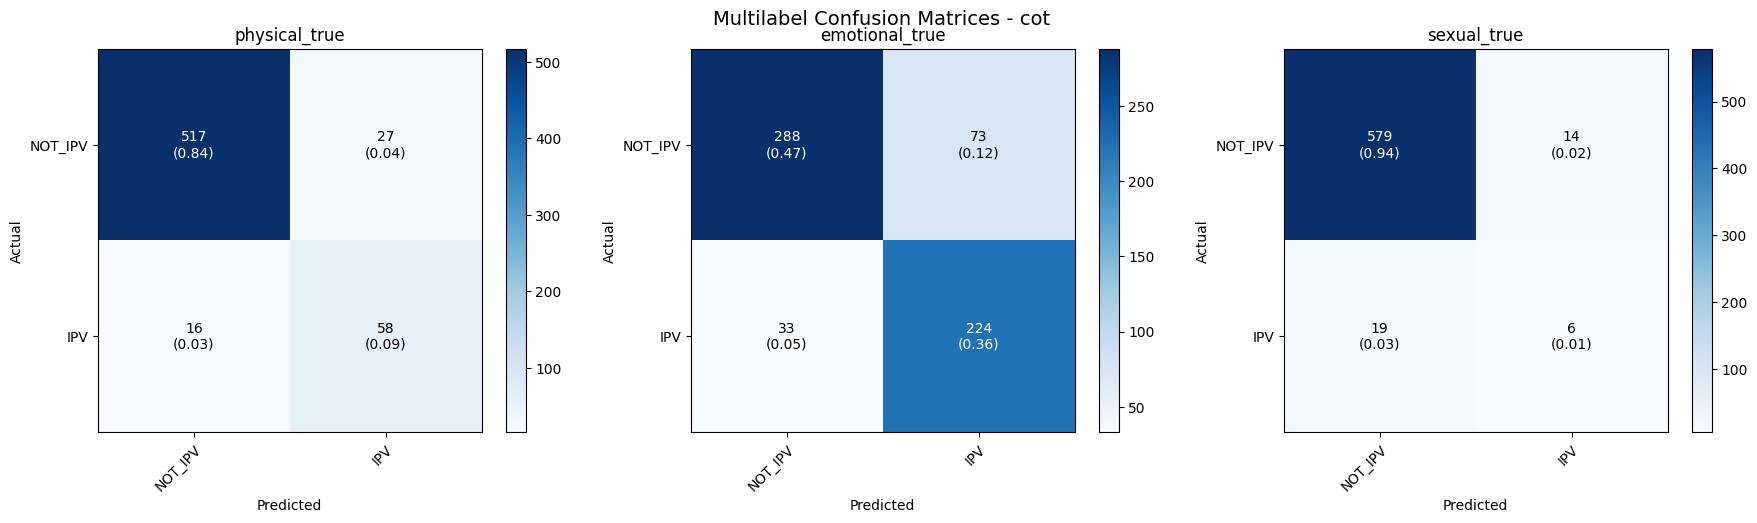

Saved F1 scores plot → qwen/multilabel_f1_scores_cot.png


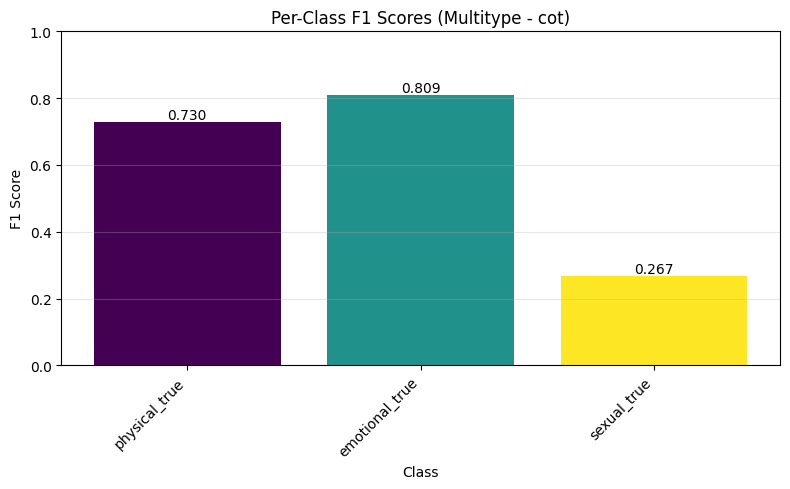


Results saved to: /Users/zeespanto/DevProj/ipvresearch25/1_LLM_Eval/results/multitype_result.json
Entry added: qwen2.5-7b - cot
  Physical: Accuracy=0.9304, F1=0.7296
  Emotional: Accuracy=0.8285, F1=0.8087
  Sexual: Accuracy=0.9466, F1=0.2667
Results also appended to results/multitype_results.json


In [22]:
# Load multitype predictions from multi_zeroshot.json
from pathlib import Path
import pandas as pd
import json

# =====================================
# Configuration
# =====================================
MULTITYPE_PROMPT_TYPE = "cot"  # Prompt type being evaluated
MULTITYPE_MODEL_NAME = "qwen2.5-7b"
MULTITYPE_RESULT_FILE = "qwen/multilabel_cot.json"  # Path to your multitype result JSON file
GT_PATH = "../../Dataset/reddit_data.csv"  # Ground truth CSV path
MULTITYPE_PROMPT_VERSION = MULTITYPE_PROMPT_TYPE

# =====================================
# Load Ground Truth
# =====================================
df_gt = pd.read_csv(GT_PATH)
# Ensure ID column exists
if "id" not in df_gt.columns:
    df_gt = df_gt.reset_index().rename(columns={"index": "id"})
else:
    df_gt["id"] = df_gt["id"].astype(int)

print(f"Ground truth loaded: {len(df_gt)} samples")

# =====================================
# Load Predictions
# =====================================
if Path(MULTITYPE_RESULT_FILE).exists():
    print(f"Loading predictions from: {MULTITYPE_RESULT_FILE}")
    with open(MULTITYPE_RESULT_FILE, 'r') as f:
        predictions_data = json.load(f)
    
    predictions_df = pd.DataFrame(predictions_data)
    print(f"Predictions loaded: {len(predictions_df)} samples")
    print(f"Prediction columns: {predictions_df.columns.tolist()}")
    
    # Ensure ID is integer
    predictions_df["id"] = predictions_df["id"].astype(int)
    
    # Ensure predictions are integers (0 or 1)
    for col in ["emotional", "physical", "sexual"]:
        if col in predictions_df.columns:
            predictions_df[col] = predictions_df[col].astype(int).clip(0, 1)
    
    # =====================================
    # Merge with Ground Truth
    # =====================================
    merged_df = df_gt.merge(predictions_df[["id", "emotional", "physical", "sexual"]], 
                            on='id', how='inner', suffixes=('_true', '_pred'))
    
    print(f"Merged dataset: {len(merged_df)} samples")
    
    # =====================================
    # Map Column Names
    # =====================================
    # Ground truth has: "Physical Abuse", "Emotional Abuse", "Sexual Abuse" (boolean)
    # Predictions have: "emotional", "physical", "sexual" (0/1)
    
    # Convert ground truth boolean to int for comparison
    merged_df["emotional_true"] = merged_df["Emotional Abuse"].astype(int)
    merged_df["physical_true"] = merged_df["Physical Abuse"].astype(int)
    merged_df["sexual_true"] = merged_df["Sexual Abuse"].astype(int)
    
    # Map prediction columns (they're already named correctly)
    merged_df["emotional_pred"] = merged_df["emotional"].astype(int)
    merged_df["physical_pred"] = merged_df["physical"].astype(int)
    merged_df["sexual_pred"] = merged_df["sexual"].astype(int)
    
    # Column pairs: (true_col, pred_col, label_name)
    label_mapping = [
        ("physical_true", "physical_pred", "Physical"),
        ("emotional_true", "emotional_pred", "Emotional"),
        ("sexual_true", "sexual_pred", "Sexual")
    ]
    
    true_cols = [pair[0] for pair in label_mapping]
    pred_cols = [pair[1] for pair in label_mapping]
    label_names = [pair[2] for pair in label_mapping]
    
    print(f"True columns: {true_cols}")
    print(f"Pred columns: {pred_cols}")
    
    # =====================================
    # Compute Metrics
    # =====================================
    # Optional: subgroup column (e.g., 'gender', 'age_group', 'type')
    subgroup_col = None  # Set to column name if you want per-subgroup metrics
    
    # Prepare dataframe for metrics computation
    metrics_df = merged_df.copy()
    
    # Compute multitype metrics per subgroup
    multitype_metrics = compute_multitype_metrics_per_subgroup(
        df=metrics_df,
        y_true_cols=true_cols,
        y_pred_cols=pred_cols,
        subgroup_col=subgroup_col
    )
    
    # =====================================
    # Display Metrics
    # =====================================
    print("\n=== Multitype Classification Metrics (Per Subgroup) ===")
    for subgroup, classes in multitype_metrics.items():
        print(f"\n--- Subgroup: {subgroup} ---")
        metrics_list = []
        for class_name, metrics in classes.items():
            row = {'Class': class_name, **metrics}
            metrics_list.append(row)
        metrics_table = pd.DataFrame(metrics_list)
        print(metrics_table.to_string(index=False))
    
    # =====================================
    # Visualizations
    # =====================================
    # Get overall metrics for visualization
    overall_key = "overall" if "overall" in multitype_metrics else list(multitype_metrics.keys())[0]
    overall_metrics = multitype_metrics[overall_key]
    
    # Set up plot directory
    import os
    PLOT_DIR = "qwen"
    Path(PLOT_DIR).mkdir(parents=True, exist_ok=True)
    
    # Create figure with subplots for confusion matrices
    n_classes = len(overall_metrics)
    fig, axes = plt.subplots(1, n_classes, figsize=(6 * n_classes, 5))
    if n_classes == 1:
        axes = [axes]
    
    # Confusion matrices for each class
    for idx, (class_name, class_metrics) in enumerate(overall_metrics.items()):
        # Get true and predicted for this class
        y_true_class = merged_df[true_cols[idx]].astype(int).values
        y_pred_class = merged_df[pred_cols[idx]].astype(int).values
        
        plot_confusion_matrix(
            y_true_class, y_pred_class,
            ax=axes[idx],
            title=f"{class_name}",
            xlabel="Predicted",
            ylabel="Actual",
            class_names=["NOT_IPV", "IPV"]
        )
    
    plt.suptitle(f"Multilabel Confusion Matrices - {MULTITYPE_PROMPT_TYPE}", fontsize=14)
    plt.tight_layout()
    
    # Save confusion matrices plot
    confusion_matrix_path = os.path.join(PLOT_DIR, f"multilabel_confusion_matrices_{MULTITYPE_PROMPT_TYPE}.png")
    plt.savefig(confusion_matrix_path, dpi=300, bbox_inches='tight')
    print(f"Saved confusion matrices plot → {confusion_matrix_path}")
    
    plt.show()
    plt.close()
    
    # Per-Class F1 Bar Chart
    fig_f1, ax_f1 = plt.subplots(figsize=(8, 5))
    plot_per_class_f1_bar_chart(
        overall_metrics,
        ax=ax_f1,
        title=f"Per-Class F1 Scores (Multitype - {MULTITYPE_PROMPT_TYPE})",
        xlabel="Class",
        ylabel="F1 Score"
    )
    plt.tight_layout()
    
    # Save F1 bar chart plot
    f1_chart_path = os.path.join(PLOT_DIR, f"multilabel_f1_scores_{MULTITYPE_PROMPT_TYPE}.png")
    plt.savefig(f1_chart_path, dpi=300, bbox_inches='tight')
    print(f"Saved F1 scores plot → {f1_chart_path}")
    
    plt.show()
    plt.close()
    
    # =====================================
    # Save Results to multitype_result.json
    # =====================================
    MULTITYPE_RESULT_JSON_PATH = "../results/multitype_result.json"
    
    # Get overall metrics (or first subgroup if no overall)
    overall_key = "overall" if "overall" in multitype_metrics else list(multitype_metrics.keys())[0]
    overall_metrics_data = multitype_metrics[overall_key]
    
    # Format the results entry
    from datetime import datetime
    
    result_entry = {
        "model": MULTITYPE_MODEL_NAME,
        "prompt_type": MULTITYPE_PROMPT_TYPE,
        "date_tested": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "total_samples": len(merged_df),
        "metrics": {
            "physical": {
                "accuracy": float(overall_metrics_data.get("physical_true", {}).get("accuracy", 0.0)),
                "precision": float(overall_metrics_data.get("physical_true", {}).get("precision", 0.0)),
                "recall": float(overall_metrics_data.get("physical_true", {}).get("recall", 0.0)),
                "f1": float(overall_metrics_data.get("physical_true", {}).get("f1", 0.0)),
                "true_positives": int(overall_metrics_data.get("physical_true", {}).get("true_positives", 0)),
                "false_positives": int(overall_metrics_data.get("physical_true", {}).get("false_positives", 0)),
                "true_negatives": int(overall_metrics_data.get("physical_true", {}).get("true_negatives", 0)),
                "false_negatives": int(overall_metrics_data.get("physical_true", {}).get("false_negatives", 0)),
            },
            "emotional": {
                "accuracy": float(overall_metrics_data.get("emotional_true", {}).get("accuracy", 0.0)),
                "precision": float(overall_metrics_data.get("emotional_true", {}).get("precision", 0.0)),
                "recall": float(overall_metrics_data.get("emotional_true", {}).get("recall", 0.0)),
                "f1": float(overall_metrics_data.get("emotional_true", {}).get("f1", 0.0)),
                "true_positives": int(overall_metrics_data.get("emotional_true", {}).get("true_positives", 0)),
                "false_positives": int(overall_metrics_data.get("emotional_true", {}).get("false_positives", 0)),
                "true_negatives": int(overall_metrics_data.get("emotional_true", {}).get("true_negatives", 0)),
                "false_negatives": int(overall_metrics_data.get("emotional_true", {}).get("false_negatives", 0)),
            },
            "sexual": {
                "accuracy": float(overall_metrics_data.get("sexual_true", {}).get("accuracy", 0.0)),
                "precision": float(overall_metrics_data.get("sexual_true", {}).get("precision", 0.0)),
                "recall": float(overall_metrics_data.get("sexual_true", {}).get("recall", 0.0)),
                "f1": float(overall_metrics_data.get("sexual_true", {}).get("f1", 0.0)),
                "true_positives": int(overall_metrics_data.get("sexual_true", {}).get("true_positives", 0)),
                "false_positives": int(overall_metrics_data.get("sexual_true", {}).get("false_positives", 0)),
                "true_negatives": int(overall_metrics_data.get("sexual_true", {}).get("true_negatives", 0)),
                "false_negatives": int(overall_metrics_data.get("sexual_true", {}).get("false_negatives", 0)),
            }
        },
        "notes": f"Evaluation of {MULTITYPE_PROMPT_TYPE} prompt"
    }
    
    # Load existing results or create new list
    result_json_path = Path(MULTITYPE_RESULT_JSON_PATH)
    result_json_path.parent.mkdir(parents=True, exist_ok=True)
    
    if result_json_path.exists():
        with open(result_json_path, 'r', encoding='utf-8') as f:
            existing_results = json.load(f)
        # Ensure it's a list
        if not isinstance(existing_results, list):
            existing_results = [existing_results] if existing_results else []
    else:
        existing_results = []
    
    # Append new result
    existing_results.append(result_entry)
    
    # Save to JSON file
    with open(result_json_path, 'w', encoding='utf-8') as f:
        json.dump(existing_results, f, indent=2, ensure_ascii=False)
    
    print(f"\nResults saved to: {result_json_path.resolve()}")
    print(f"Entry added: {MULTITYPE_MODEL_NAME} - {MULTITYPE_PROMPT_TYPE}")
    print(f"  Physical: Accuracy={result_entry['metrics']['physical']['accuracy']:.4f}, F1={result_entry['metrics']['physical']['f1']:.4f}")
    print(f"  Emotional: Accuracy={result_entry['metrics']['emotional']['accuracy']:.4f}, F1={result_entry['metrics']['emotional']['f1']:.4f}")
    print(f"  Sexual: Accuracy={result_entry['metrics']['sexual']['accuracy']:.4f}, F1={result_entry['metrics']['sexual']['f1']:.4f}")
    
    # Also save using the existing function for consistency
    append_multitype_results_to_json(
        json_path=MULTITYPE_JSON_PATH,
        model_name=MULTITYPE_MODEL_NAME,
        prompt_version=MULTITYPE_PROMPT_VERSION,
        metrics_per_subgroup=multitype_metrics,
        notes=f"Evaluation of {MULTITYPE_PROMPT_TYPE} prompt"
    )
    print(f"Results also appended to {MULTITYPE_JSON_PATH}")
    
else:
    print(f"Multitype result file not found: {MULTITYPE_RESULT_FILE}")
    print("Please update MULTITYPE_RESULT_FILE path in the configuration above.")


# SAVE TO GITHUB

In [ ]:
%cd /content/ipvresearch25/
!ls -a
!git config --global user.email "zeespanto@gmail.com"
!git config --global user.name "Zelan Eroz Espanto"
# add authenhtication since I cloned using "https://github.com/zelaneroz/ipvresearch25"
# need this since git will reject pushes (403) since it's unauthenticated

import getpass, os
token = getpass.getpass("GitHub Token: ")
os.environ["GITHUB_TOKEN"] = token
!git remote set-url origin https://$GITHUB_TOKEN@github.com/zelaneroz/ipvresearch25.git

In [ ]:
#Verify
!git remote -v

In [ ]:
#Stage changes
!git add -A
#Commit
!git commit -m "w4 qwen zeroshot experiment ran"
#Push
!git push origin main